In [1]:
import numpy as np
import scipy.ndimage as ndi

In [2]:
def compute_level_set(f, c, atol=1e-3):
    return np.where(np.isclose(f,c,atol=atol))

def identify_critical_points(f, x):
    gradient = np.gradient(f, x)
    return compute_level_set(gradient, 0)

def construct_reeb_graph(f, x):
    critical_points = identify_critical_points(f, x)
    vertices = [(x,f) for x, f in zip(x[critical_points], f[critical_points])]
    edges = [(vertices[i], vertices[i+1]) for i in range(len(vertices)-1)]
    return {'vertices': vertices, 'edges': edges}

def anomaly_detection_reeb_graph(f, x):
    reeb_graph = construct_reeb_graph(f, x)
    anomalies = []
    for vertex in reeb_graph['vertices']:
        if is_anomalous(vertex):
            anomalies.append(vertex)
    return anomalies

def is_anomalous(vertex):
    return vertex[1] > 0.8 or vertex[1] < -0.8

In [3]:
x_data = np.linspace(0, 10*np.pi, 100000)
f_data = np.sin(x_data)

level_set = compute_level_set(f_data, 0)
critical_points = identify_critical_points(f_data, x_data)
reeb_graph = construct_reeb_graph(f_data, x_data)
anomalies = anomaly_detection_reeb_graph(f_data, x_data)

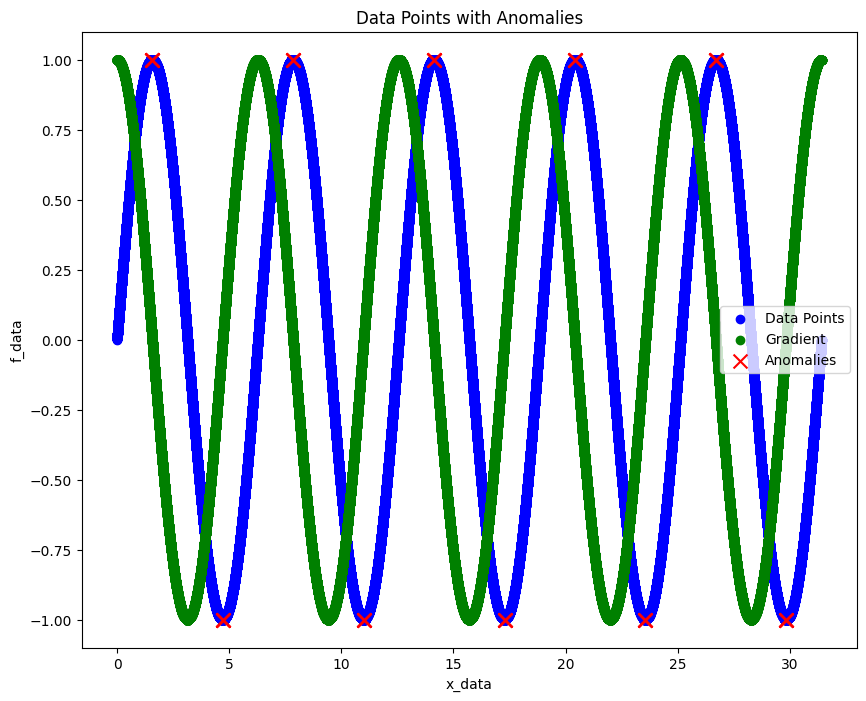

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Create a scatter plot for x_data and f_data
plt.scatter(x_data, f_data, label='Data Points', color='blue')
plt.scatter(x_data, np.gradient(f_data, x_data), label='Gradient', color='green')

# Separate the anomalies into x and y for plotting
anomalies_x, anomalies_y = zip(*anomalies)

# Plot the anomalies with a distinctive marker and color
plt.scatter(anomalies_x, anomalies_y, label='Anomalies', color='red', marker='x', s=100)

# Add labels and a legend
plt.xlabel('x_data')
plt.ylabel('f_data')
plt.title('Data Points with Anomalies')
plt.legend()

# Show the plot
plt.show()